# Link Google Colab
[Google Colab](https://colab.research.google.com/drive/1jaSA76zlLpvTyONan_OY4THN43mKBiEi?usp=sharing)

## Install and Import Library

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from google.colab import drive
from datetime import datetime
import pytz

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer

import pycaret
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

## Load Data

In [ ]:
!wget https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx

--2024-09-04 14:53:19--  https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx [following]
--2024-09-04 14:53:19--  https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42737 (42K) [application/octet-stream]
Saving to: ‘01-09-24-modified_fertilizer_datav5.xlsx’

01-09-24-modified_f 100%[===================>]  41.74K

In [ ]:
date_col = 'date'
target_col = 'urea_price'

In [ ]:
data = pd.read_excel('01-09-24-modified_fertilizer_datav5.xlsx')
data

,date,dap_price,kcl_price,rock_price,tsp_price,urea_price
0,1993-11-01,140.40,112.50,31.5,112.50,82.80
1,1993-12-01,150.38,112.50,31.5,122.50,85.50
2,1994-01-01,150.00,112.50,31.5,125.00,85.50
3,1994-02-01,151.75,112.50,31.5,125.63,85.50
4,1994-03-01,155.88,112.50,31.5,127.50,98.63
...,...,...,...,...,...,...
361,2023-12-01,563.75,311.88,152.5,447.50,354.00
362,2024-01-01,596.25,296.25,152.5,450.63,335.38
363,2024-02-01,583.81,289.38,152.5,454.38,351.25
364,2024-03-01,617.50,300.50,152.5,449.00,330.00


In [ ]:
data = data[[date_col, target_col]]
data

,date,urea_price
0,1993-11-01,82.80
1,1993-12-01,85.50
2,1994-01-01,85.50
3,1994-02-01,85.50
4,1994-03-01,98.63
...,...,...
361,2023-12-01,354.00
362,2024-01-01,335.38
363,2024-02-01,351.25
364,2024-03-01,330.00


# Data Preparation

## Format Data

In [ ]:
data[date_col] = pd.to_datetime(data[date_col])
data.set_index(date_col, inplace=True)
data = data.asfreq('MS')

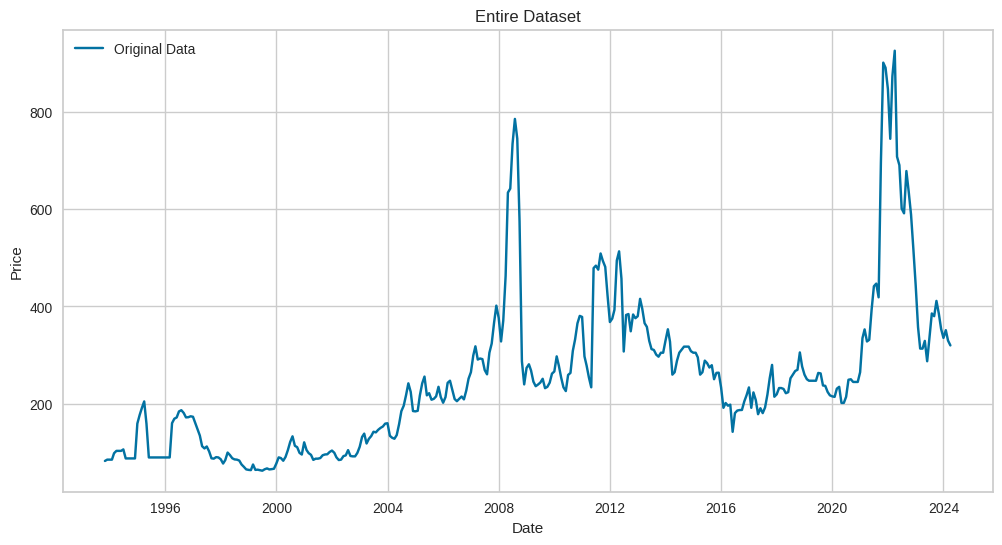

In [ ]:
# Plot the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[target_col], label='Original Data')
plt.title('Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Detect and Interpolate Null and Zero Values

In [ ]:
data[target_col] = data[target_col].replace(0, np.nan)
if data[target_col].isnull().any():
  data[target_col] = data[target_col].interpolate(method='linear')
  data[target_col] = data[target_col].fillna(method='ffill').fillna(method='bfill')

## Train Test Split

In [ ]:
n_test = 6

In [ ]:
train_data, test_data = train_test_split(data, test_size=n_test, shuffle=False)

In [ ]:
train_data

,urea_price
date,
1993-11-01,82.80
1993-12-01,85.50
1994-01-01,85.50
1994-02-01,85.50
1994-03-01,98.63
...,...
2023-06-01,287.50
2023-07-01,334.63
2023-08-01,385.63


In [ ]:
test_data

,urea_price
date,
2023-11-01,385.50
2023-12-01,354.00
2024-01-01,335.38
2024-02-01,351.25
2024-03-01,330.00
2024-04-01,320.00


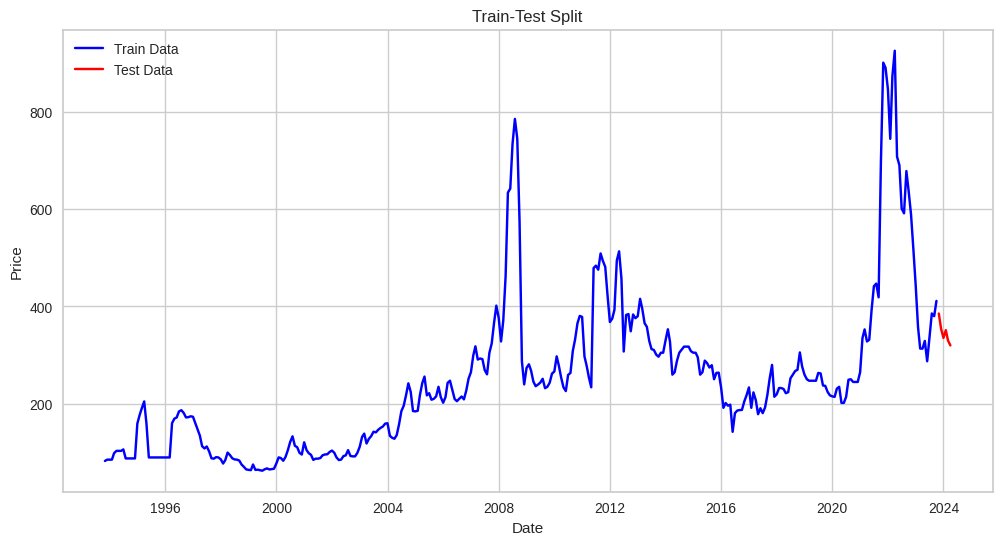

In [ ]:
# Plot the train and test split
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train Data', color='blue')
plt.plot(test_data.index, test_data[target_col], label='Test Data', color='red')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Basic Modeling

## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Create Model


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [ ]:
model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-04,0.9141,0.7056,89.0955,103.2258,0.1420,0.1307,-4.4508
1,2022-10,1.9494,1.5030,201.3586,233.3946,0.5739,0.4065,-3.9907
2,2023-04,0.5414,0.4454,56.9071,69.8616,0.1497,0.1674,-1.8223
Mean,NaT,1.1350,0.8846,115.7871,135.4940,0.2885,0.2349,-3.4213
SD,NaT,0.5956,0.4499,61.9187,70.5535,0.2018,0.1223,1.1461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predict

In [ ]:
holdout_pred = predict_model(model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.8681,0.6120,91.6333,95.7421,0.2700,0.2350,-19.3958


In [ ]:
holdout_pred

,y_pred
2023-11,418.1793
2023-12,443.7500
2024-01,451.7939
2024-02,447.6205
2024-03,439.8563
2024-04,424.7300


## Visualize

In [ ]:
plot_model(model, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,418.1793
2023-12-01,354.00,443.7500
2024-01-01,335.38,451.7939
2024-02-01,351.25,447.6205
2024-03-01,330.00,439.8563
2024-04-01,320.00,424.7300


## Evaluate

In [ ]:
def evaluate_forecast(y_true, y_pred):
    results = {
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
    return pd.Series(results)

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.269993
RMSE,95.742056
MAE,91.633333
R2,-19.395820


## Recap

In [ ]:
evaluation_summary = pd.DataFrame(columns=['Is Imputed?',
                                           'Scale Target',
                                           'Transform Target',
                                           'Tuned?'])

In [ ]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Is Imputed?'] = False
temp_eval['Scale Target'] = 'None'
temp_eval['Transform Target'] = 'None'
temp_eval['Tuned?'] = False
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Is Imputed?,Scale Target,Transform Target,Tuned?,MAPE,RMSE,MAE,R2
0,False,None,None,False,0.269993,95.742056,91.633333,-19.39582


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save / Load Model

In [ ]:
save_model(model, 'basic_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37,
                                                                                                                                         36,
                                                                                                                                         35,
                                                                                                                                         34,
                                                                                                                                         33,
                                                                                                                                         32,
                                     

In [ ]:
loaded_from_disk = load_model('basic_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37,
                                                                                                                                        36,
                                                                                                                                        35,
                                                                                                                                        34,
                                                                                                                                        33,
                                                                                                                                        32,
                                                                                                                                        31,
                                                                                                                                        30,
                                                                                                                                        29,
                                                                                                                                        28,
                                                                                                                                        27,
                                                                                                                                        26,
                                                                                                                                        25,
                                                                                                                                        24,
                                                                                                                                        23,
                                                                                                                                        22,
                                                                                                                                        21,
                                                                                                                                        20,
                                                                                                                                        19,
                                                                                                                                        18,
                                                                                                                                        17,
                                                                                                                                        16,
                                                                                                                                        15,
                                                                                                                                        14,
                                                                                                                                        13,
                                                                                                                                        12,
                                                                                                                                        11,
                                                                                                         

# Modeling + Outlier Imputation

## Define Outlier Imputation

In [ ]:
def detect_and_impute_outlier(data, target_col) :
  Q1, Q3 = data[target_col].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  outlier_indices = data[(data[target_col] < Q1 - 1.5 * IQR) | (data[target_col] > Q3 + 1.5 * IQR)].index

  imputer = SimpleImputer(strategy='median')
  imputed_data = pd.DataFrame(index=train_data.index, data=train_data[target_col])
  imputed_data.loc[outlier_indices, target_col] = np.nan
  imputed_data[target_col] = imputer.fit_transform(imputed_data)

  result = data.copy(deep=True)
  result[target_col] = imputed_data[target_col]

  return result

## Apply Outlier Imputation

In [ ]:
imputed_train_data = detect_and_impute_outlier(train_data, target_col)
display(imputed_train_data)

,urea_price
date,
1993-11-01,82.80
1993-12-01,85.50
1994-01-01,85.50
1994-02-01,85.50
1994-03-01,98.63
...,...
2023-06-01,287.50
2023-07-01,334.63
2023-08-01,385.63


## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    imputed_train_data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    imputed_train_data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Create Model


In [ ]:
model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-10,1.5061,1.2568,73.0034,82.7635,0.3347,0.2762,-8479630545425422787981462208512.0000
1,2022-04,0.5537,0.4268,27.5159,28.7194,0.1261,0.1181,-1021055025842119242937245106176.0000
2,2022-10,2.5955,2.3643,131.7089,164.9859,0.3155,0.4036,-1.8714
Mean,NaT,1.5518,1.3493,77.4094,92.1562,0.2588,0.2660,-3166895190422513822656251297792.0000
SD,NaT,0.8342,0.7937,42.6506,56.0256,0.0941,0.1168,3779727155556141301648297295872.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predict

In [ ]:
holdout_pred = predict_model(model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.4695,0.4014,24.5795,29.2415,0.0685,0.0681,0.5055


In [ ]:
holdout_pred

,y_pred
2023-05,292.0364
2023-06,304.6458
2023-07,348.1622
2023-08,365.4626
2023-09,386.2944
2023-10,464.5034


## Visualize

In [ ]:
plot_model(model, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,292.0364
2023-12-01,354.00,304.6458
2024-01-01,335.38,348.1622
2024-02-01,351.25,365.4626
2024-03-01,330.00,386.2944
2024-04-01,320.00,464.5034


## Evaluate

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.180434
RMSE,77.014021
MAE,61.768400
R2,-12.197002


## Recap

In [ ]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Is Imputed?'] = True
temp_eval['Scale Target'] = 'None'
temp_eval['Transform Target'] = 'None'
temp_eval['Tuned?'] = False
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Is Imputed?,Scale Target,Transform Target,Tuned?,MAPE,RMSE,MAE,R2
0,False,None,None,False,0.269993,95.742056,91.633333,-19.395820
1,True,None,None,False,0.180434,77.014021,61.768400,-12.197002


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save / Load Model

In [ ]:
save_model(model, 'model+outlier_imputation')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                         9,
                                                                                                                                         8,
                                                                                                                                         7,
                                                                                                                                         6,
                                                                                                                                         5,
                                          

In [ ]:
loaded_from_disk = load_model('model+outlier_imputation')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_sto...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...),
                                                                                    sp=10))]))])

# Modeling + Outlier Imputation + Scaler

## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    imputed_train_data,
    scale_target = 'minmax',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    imputed_train_data,
    scale_target = 'minmax',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Create Model


In [ ]:
model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-10,1.6691,1.4216,80.9060,93.6160,0.3709,0.2983,-10849246012284485731179854561280.0000
1,2022-04,0.5607,0.4328,27.8646,29.1267,0.1277,0.1194,-1050222580956891946842035585024.0000
2,2022-10,2.5011,2.3278,126.9175,162.4420,0.3006,0.3843,-1.7835
Mean,NaT,1.5770,1.3941,78.5627,95.0616,0.2664,0.2674,-3966489531080459742044754018304.0000
SD,NaT,0.7948,0.7739,40.4721,54.4354,0.1022,0.1103,4885693021606040664349335355392.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predict

In [ ]:
holdout_pred = predict_model(model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.5266,0.4648,27.5668,33.8544,0.0765,0.0752,0.3372


In [ ]:
holdout_pred

,y_pred
2023-05,294.6061
2023-06,309.1847
2023-07,350.4190
2023-08,361.4938
2023-09,376.9205
2023-10,477.4478


## Visualize

In [ ]:
plot_model(model, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,294.6061
2023-12-01,354.00,309.1847
2024-01-01,335.38,350.4190
2024-02-01,351.25,361.4938
2024-03-01,330.00,376.9205
2024-04-01,320.00,477.4478


## Evaluate

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.178432
RMSE,79.154450
MAE,60.893383
R2,-12.940757


## Recap

In [ ]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Is Imputed?'] = True
temp_eval['Scale Target'] = 'MinMax'
temp_eval['Transform Target'] = 'None'
temp_eval['Tuned?'] = False
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Is Imputed?,Scale Target,Transform Target,Tuned?,MAPE,RMSE,MAE,R2
0,False,None,None,False,0.269993,95.742056,91.633333,-19.395820
1,True,None,None,False,0.180434,77.014021,61.768400,-12.197002
2,True,MinMax,None,False,0.178432,79.154450,60.893383,-12.940757


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save / Load Model

In [ ]:
save_model(model, 'model+outlier_imputation+scaler')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                         9,
                                                                                                                                         8,
                                                                                                                           

In [ ]:
loaded_from_disk = load_model('model+outlier_imputation+scaler')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('scaler',
                                                                                            TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=XGBRegressor(base_score=None, booster...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...),
                                                                                    sp=10))]))])

# Modeling + Outlier Imputation + Scaler + Transform Target

## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    imputed_train_data,
    scale_target = 'minmax',
    transform_target = 'box-cox',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    imputed_train_data,
    scale_target = 'minmax',
    transform_target = 'box-cox',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Create Model


In [ ]:
model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-10,0.5650,0.4192,27.3887,27.6074,0.1256,0.1180,-943515633452754944627291717632.0000
1,2022-04,0.1347,0.1130,6.6936,7.6057,0.0307,0.0311,-71610814197052720999867351040.0000
2,2022-10,2.2111,2.1401,112.2009,149.3389,0.2626,0.3290,-1.3526
Mean,NaT,0.9703,0.8908,48.7611,61.5173,0.1396,0.1594,-338375482549935906134572400640.0000
SD,NaT,0.8948,0.8922,45.6474,62.6338,0.0952,0.1251,428896241417825258854957449216.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predict

In [ ]:
holdout_pred = predict_model(model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.6866,0.6169,35.9428,44.9377,0.0961,0.1019,-0.1678


In [ ]:
holdout_pred

,y_pred
2023-05,324.6133
2023-06,315.3994
2023-07,330.7889
2023-08,326.4063
2023-09,337.1124
2023-10,334.2115


## Visualize

In [ ]:
plot_model(model, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,324.6133
2023-12-01,354.00,315.3994
2024-01-01,335.38,330.7889
2024-02-01,351.25,326.4063
2024-03-01,330.00,337.1124
2024-04-01,320.00,334.2115


## Evaluate

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.069561
RMSE,31.853930
MAE,25.041000
R2,-1.257677


## Recap

In [ ]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Is Imputed?'] = True
temp_eval['Scale Target'] = 'MinMax'
temp_eval['Transform Target'] = 'Box-Cox'
temp_eval['Tuned?'] = False
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Is Imputed?,Scale Target,Transform Target,Tuned?,MAPE,RMSE,MAE,R2
0,False,None,None,False,0.269993,95.742056,91.633333,-19.395820
1,True,None,None,False,0.180434,77.014021,61.768400,-12.197002
2,True,MinMax,None,False,0.178432,79.154450,60.893383,-12.940757
3,True,MinMax,Box-Cox,False,0.069561,31.853930,25.041000,-1.257677


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save / Load Model

In [ ]:
save_model(model, 'model+outlier_imputation+scaler+transform')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('transformer',
                                                                                             BoxCoxTransformer()),
                                                                                            ('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                         9,
                                        

In [ ]:
loaded_from_disk = load_model('model+outlier_imputation+scaler+transform')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('transformer',
                                                                                            BoxCoxTransformer()),
                                                                                           ('scaler',
                                                                                            TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...),
                                                                                    sp=10))]))])

# Modeling + Outlier Imputation + Scaler + Transform Target + Autotune

## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    imputed_train_data,
    scale_target = 'minmax',
    transform_target = 'box-cox',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    imputed_train_data,
    scale_target = 'minmax',
    transform_target = 'box-cox',
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(360, 1)"
5,Transformed data shape,"(360, 1)"
6,Transformed train set shape,"(354, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Create Model


In [ ]:
model = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-10,0.5650,0.4192,27.3887,27.6074,0.1256,0.1180,-943515633452754944627291717632.0000
1,2022-04,0.1347,0.1130,6.6936,7.6057,0.0307,0.0311,-71610814197052720999867351040.0000
2,2022-10,2.2111,2.1401,112.2009,149.3389,0.2626,0.3290,-1.3526
Mean,NaT,0.9703,0.8908,48.7611,61.5173,0.1396,0.1594,-338375482549935906134572400640.0000
SD,NaT,0.8948,0.8922,45.6474,62.6338,0.0952,0.1251,428896241417825258854957449216.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Model

In [ ]:
tuned_model = tune_model(model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-10,1.2851,0.9469,62.2941,62.3582,0.2856,0.2498,-4813792120797578929910256238592.0000
1,2022-04,0.6517,0.4852,32.3876,32.6540,0.1485,0.1381,-1319991719496614723197863985152.0000
2,2022-10,2.3304,2.1398,118.2584,149.3185,0.2834,0.3523,-1.3519
Mean,NaT,1.4224,1.1906,70.9800,81.4435,0.2392,0.2467,-2044594613431398259669342355456.0000
SD,NaT,0.6922,0.6971,35.5905,49.5031,0.0641,0.0875,2030916978606332562210356723712.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


## Predict

In [ ]:
holdout_pred = predict_model(tuned_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,0.6866,0.6169,35.9428,44.9377,0.0961,0.1019,-0.1678


In [ ]:
holdout_pred

,y_pred
2023-05,324.6133
2023-06,315.3994
2023-07,330.7889
2023-08,326.4063
2023-09,337.1124
2023-10,334.2115


## Visualize

In [ ]:
plot_model(tuned_model, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,324.6133
2023-12-01,354.00,315.3994
2024-01-01,335.38,330.7889
2024-02-01,351.25,326.4063
2024-03-01,330.00,337.1124
2024-04-01,320.00,334.2115


## Evaluate

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.069561
RMSE,31.853930
MAE,25.041000
R2,-1.257677


## Recap

In [ ]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Is Imputed?'] = True
temp_eval['Scale Target'] = 'MinMax'
temp_eval['Transform Target'] = 'Box-Cox'
temp_eval['Tuned?'] = True
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Is Imputed?,Scale Target,Transform Target,Tuned?,MAPE,RMSE,MAE,R2
0,False,None,None,False,0.269993,95.742056,91.633333,-19.395820
1,True,None,None,False,0.180434,77.014021,61.768400,-12.197002
2,True,MinMax,None,False,0.178432,79.154450,60.893383,-12.940757
3,True,MinMax,Box-Cox,False,0.069561,31.853930,25.041000,-1.257677
4,True,MinMax,Box-Cox,True,0.069561,31.853930,25.041000,-1.257677


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save / Load Model

In [ ]:
save_model(model, 'model+outlier_imputation+scaler+transform+tuned')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('transformer',
                                                                                             BoxCoxTransformer()),
                                                                                            ('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                         9,
                                        

In [ ]:
loaded_from_disk = load_model('model+outlier_imputation+scaler+transform+tuned')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('transformer',
                                                                                            BoxCoxTransformer()),
                                                                                           ('scaler',
                                                                                            TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...),
                                                                                    sp=10))]))])